# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Завантажуємо дані
df = pd.read_csv('../data/House_Rent_Dataset.csv', sep=None, engine='python')

# Виволимо розмір датасету
df.shape

(4746, 12)

In [2]:
# Виводимо перші 5 рядків
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
# Загальна інформація про датафрейм
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [4]:
# Пропущені значення
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_percent

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

<span style="color:green">**Отже, всі записи в датасеті заповнені, й дані не потребують додаткової очистки/обробки.**</span>

In [5]:
# Опис числових змінних
stats = df[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
stats.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


<span style="color:green">**З огляду на максимальні значення різних ознак квартир, можна зробити висновок, що деякі дорогі квартири утворюють викиди, що впливають на середні значення.**</span>

C:\Users\User\anaconda3\desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



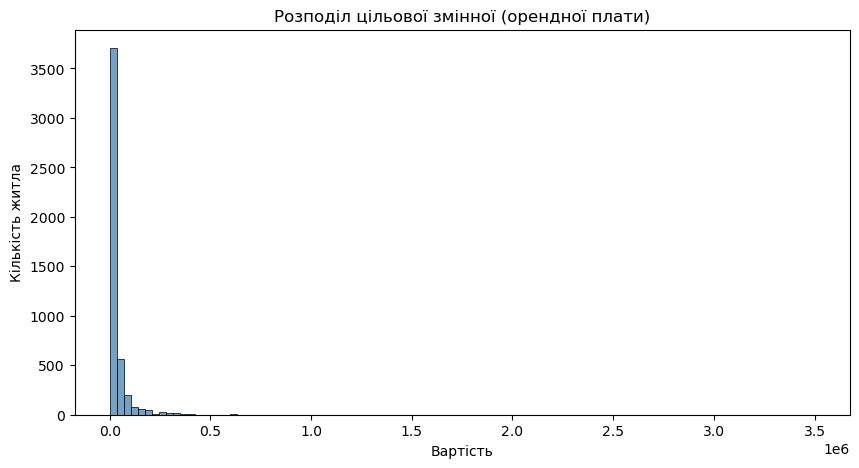

In [47]:
# Розподіл орендної плати (Rent)
plt.figure(figsize=(10,5))
sns.histplot(df["Rent"], bins=100, kde=False, color="steelblue")
plt.title("Розподіл цільової змінної (орендної плати)")
plt.xlabel("Вартість")
plt.ylabel("Кількість житла")
plt.show()

<span style="color:green">**Отримана гістограма є підтвердженням попередньо сформованій тезі: квартири, що мають значно меншу вартіть орендної плати, складають більшість; дороговартісних квартиир значно менше. Видалимо викиди для точнішого аналізу.**</span>

Межі: -24500.0 67500.0
До очищення: 4746
Після очищення: 4226


C:\Users\User\anaconda3\desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



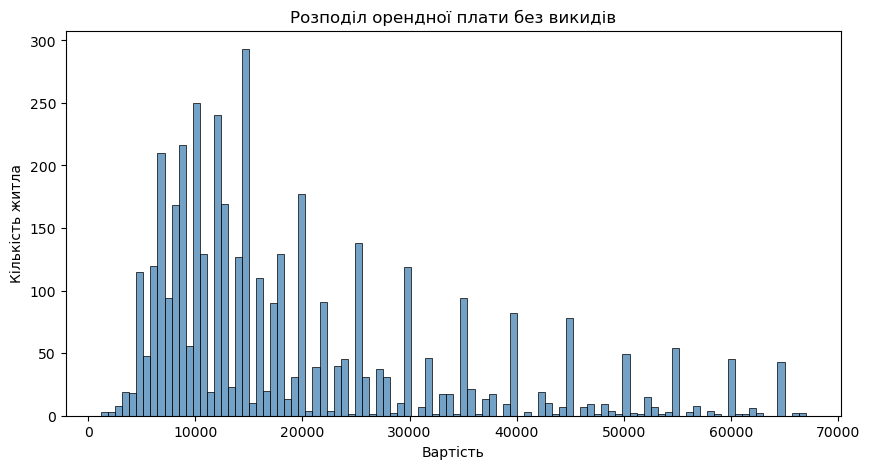

In [8]:
# Метод IQR для видалення викидів у колонці "Rent"
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1                    # міжквартильний розмах

# межі для виявлення викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Межі:", lower_bound, upper_bound)

# фільтрація даних
df_clean = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]

print("До очищення:", df.shape[0])
print("Після очищення:", df_clean.shape[0])

# візуалізація після очищення
import plotly.express as px

plt.figure(figsize=(10,5))
sns.histplot(df_clean["Rent"], bins=100, kde=False, color="steelblue")
plt.title("Розподіл орендної плати без викидів")
plt.xlabel("Вартість")
plt.ylabel("Кількість житла")
plt.show()

<span style="color:green">**Такий розподіл більше схожий на рівномірний, і з ним буде легше працювати.**</span>

In [10]:
# Визначимо категоріальні колонки
cat_cols = ['Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
# Виведимо унікальні значення для цих колонок
df[cat_cols].nunique()

Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64

<span style="color:green">**Зручно, що більшість показників мають невелику кількість унікальних значень, це допоможе при аналізі.**</span>

<span style="color:green">**Колонку Area Locality, можливо, доведеться видалити.**</span>


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [11]:
# Матриця кореляцій
correlation_matrix = df_clean.select_dtypes('number').corr()
correlation_matrix

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.401268,0.698453,0.747918
Rent,0.401268,1.000000,0.393605,0.506528
Size,0.698453,0.393605,1.000000,0.680607
Bathroom,0.747918,0.506528,0.680607,1.000000


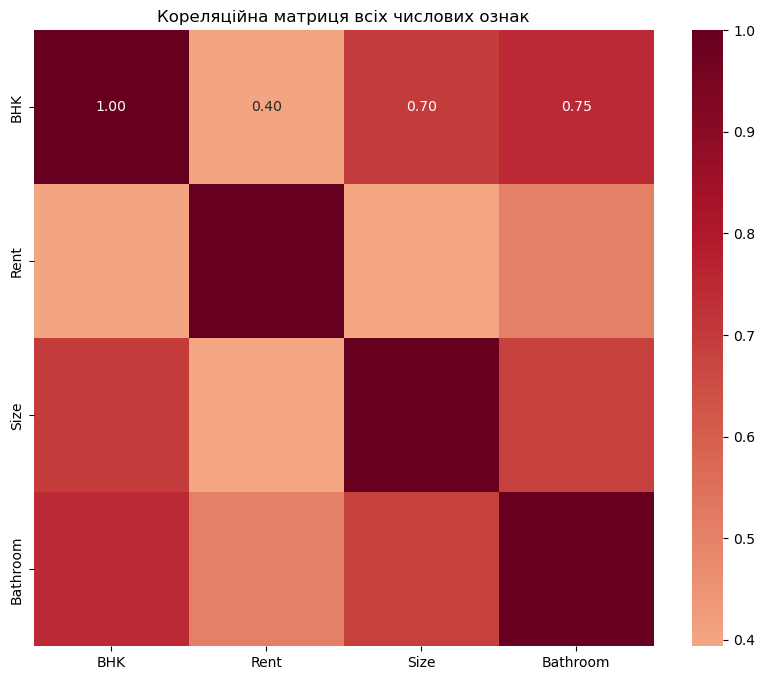

In [12]:
# Візуалізація кореляцій
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Кореляційна матриця всіх числових ознак")
plt.show()

<span style="color:green">**З отриманої гістограми важко сказати, що числові ознаки сильно залежать одна від одної, частіше навпаки- зв'язок малий**</span>

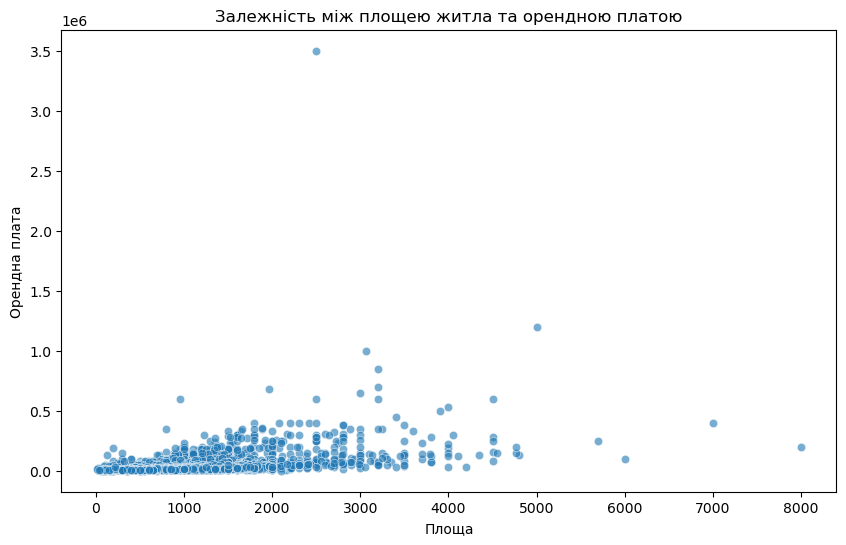

In [14]:
# Побудуємо scatter plot між Size та Rent
plt.figure(figsize=(10,6))
sns.scatterplot(x="Size", y="Rent", data=df, alpha=0.6)
plt.title("Залежність між площею житла та орендною платою")
plt.xlabel("Площа")
plt.ylabel("Орендна плата")
plt.show()

<span style="color:green">**Скоріш за все, показник Size не є вирішальним у процесі формування орендної плати за житло, адже залежність між показниками Size і Rent слабка. Крім цього, тут теж помітні викиди з дорогими квартирами.**</span>

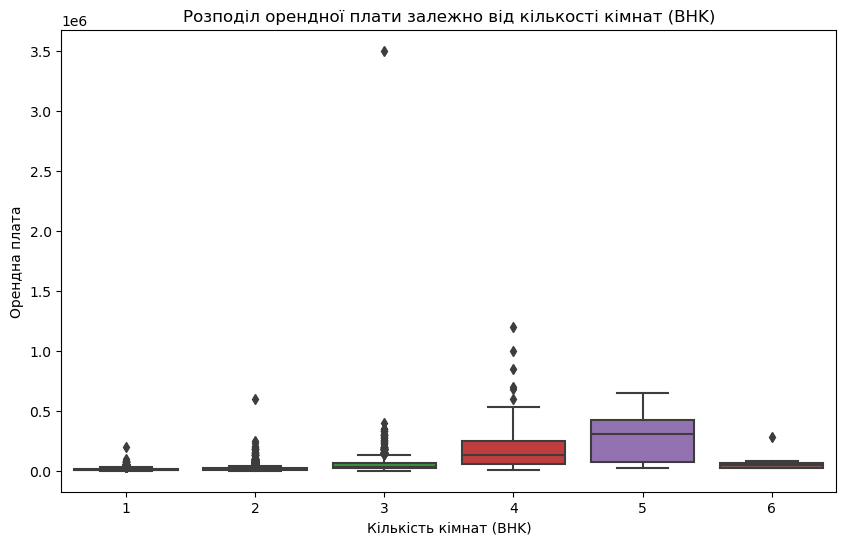

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x="BHK", y="Rent", data=df)
plt.title("Розподіл орендної плати залежно від кількості кімнат (BHK)")
plt.xlabel("Кількість кімнат (BHK)")
plt.ylabel("Орендна плата")
plt.show()

<span style="color:green">**У випадку з показником BHK, прослідковується лінійна залжність. Що більше кімнат, то більша орендна плата. При цьому зберігається тенденція з викидами.**</span>

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [18]:
# One-Hot Encoding для категоріальних змінних з невеликою кількістю різних значень
df_ohe = pd.get_dummies(
    df, 
    columns=["City", "Furnishing Status", "Tenant Preferred", "Area Type"], 
    drop_first=True
)

<span style="color:green">**Як і було передбачено раніше, краще виключити з One-Hot Encoding метода категорію Area Locality. Краще попередньо згрупувати її окремо.**</span>

In [19]:
# Групування кат. змінної Area Locality

top_area_loc = df['Area Locality'].value_counts().head(10).index
df_ohe['Area_Locality_grouped'] = df['Area Locality'].apply(
    lambda x: x if x in top_area_loc else 'other'
)

In [20]:
# Додаємо отримане до основного датафрейму

locality_dummies = pd.get_dummies(df_ohe["Area_Locality_grouped"], prefix="Locality")
df_ohe = pd.concat([df_ohe, locality_dummies], axis=1)

In [21]:
# Додамо нові ознаки

df_ohe["Rent_per_sqft"] = df_ohe["Rent"] / df_ohe["Size"]   # оренда за квадратний фут
df_ohe["BHK_per_bath"] = df_ohe["BHK"] / df_ohe["Bathroom"] # співвідношення BHK до ванних кімнат

In [22]:
# Оберемо ознаки для побудови моделі

df_ohe = df_ohe.drop(columns=["Area Locality", "Point of Contact", "Area_Locality_grouped", "Floor"])

In [23]:
# Розділимо дані на ознаки (X) та цільову змінну (y)
X = df_ohe.drop(columns=["Rent"])  # всі обрані ознаки, крім Rent
y = df_ohe["Rent"]

# Застосуємо стандартизацію до числових ознак
from sklearn.preprocessing import StandardScaler

# Числові колонки для масштабування
num_cols = ["Size", "BHK", "Bathroom", "Rent_per_sqft", "BHK_per_bath"]

scaler = StandardScaler()

# Масштабуємо числові колонки
X_scaled_num = scaler.fit_transform(X[num_cols])

# Перетворюємо назад у DataFrame
X_scaled_num_df = pd.DataFrame(X_scaled_num, columns=num_cols, index=X.index)

# Замінюємо в X оригінальні числові колонки на масштабовані
X[num_cols] = X_scaled_num_df

print("Форма ознак до масштабування:", X.shape)
print("Форма ознак після масштабування:", X.shape)

# Подивимось перші 5 рядків масштабованих числових ознак
X[num_cols].head()


Форма ознак до масштабування: (4746, 28)
Форма ознак після масштабування: (4746, 28)


,Size,BHK,Bathroom,Rent_per_sqft,BHK_per_bath
0,0.208960,-0.100773,0.038594,-0.504039,-0.323967
1,-0.264125,-0.100773,-1.092067,-0.238218,2.368510
2,0.051265,-0.100773,-1.092067,-0.371888,2.368510
3,-0.264125,-0.100773,-1.092067,-0.447077,2.368510
4,-0.185277,-0.100773,-1.092067,-0.508506,2.368510


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [24]:
# Розділимо дані на навчальну (80%) та тестову (20%) вибірки

from sklearn.model_selection import train_test_split

# Розділяємо дані: 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_num_df, y,
    test_size=0.2,  # 20% даних йде на тест
    random_state=42  # фіксуємо випадковість для відтворюваності
)

In [25]:
# Створимо модель лінійної регресії

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Виводимо ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

Size: 39766.96
BHK: -11500.97
Bathroom: 5491.51
Rent_per_sqft: 47536.32
BHK_per_bath: 2973.40

Зміщення (intercept): 34923.19


<span style="color:green">**Найбільший вплив на зростання ознаки Rent мають ознаки Rent_per_sqft (47536.32) і Size (39766.96); BHK (-11500.97) сприяє зменшенню значеннь Rent. 
Найбільший вплив на цільову ознаку має Rent_per_sqft (47536.32) ознака.**</span>

In [27]:
# Прогнози на навчальній вибірці
y_train_pred = model.predict(X_train)

# Прогнози на тестовій вибірці (нові дані!)
y_test_pred = model.predict(X_test)

# Порівняння перших 10 прогнозів з реальністю
comparison = pd.DataFrame({
    'Реальна орендна плата': y_test.values[:10],
    'Прогнозована орендна плата': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})
print("Приклади прогнозів на тестовій вибірці:")
print(comparison)

Приклади прогнозів на тестовій вибірці:
   Реальна орендна плата  Прогнозована орендна плата   Помилка
0                  16000                     24013.0   -8013.0
1                  12000                      5561.0    6439.0
2                  28000                     18896.0    9104.0
3                   8000                     34169.0  -26169.0
4                  46000                    101588.0  -55588.0
5                  17000                     22184.0   -5184.0
6                  57000                     55110.0    1890.0
7                   9500                     -1845.0   11345.0
8                 400000                    212115.0  187885.0
9                  15000                      2569.0   12431.0


<span style="color:green">**Отримана модель є неточною. Деякі значення помилок перевищують середнє значення для орендної плати.**</span>

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Розраховуємо метрики для тестової вибірки
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):")
print("="*50)
print(f"\nMAE: {mae:.2f} одиниць")
print(f"RMSE: {rmse:.2f} одиниць")
print(f"R²: {r2:.3f}")

# Порівняння з навчальною вибіркою
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f} одиниць")
print(f"RMSE: {rmse:.2f} одиниць")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):

MAE: 18302.37 одиниць
RMSE: 39737.95 одиниць
R²: 0.604
МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:

MAE: 19662.74 одиниць
RMSE: 57238.28 одиниць
R²: 0.506


<span style="color:green">**Отримана модель показала себе доволі добре. R² > 0.5, і MAE, RMSE не перевищують середнє значення ознаки**</span>

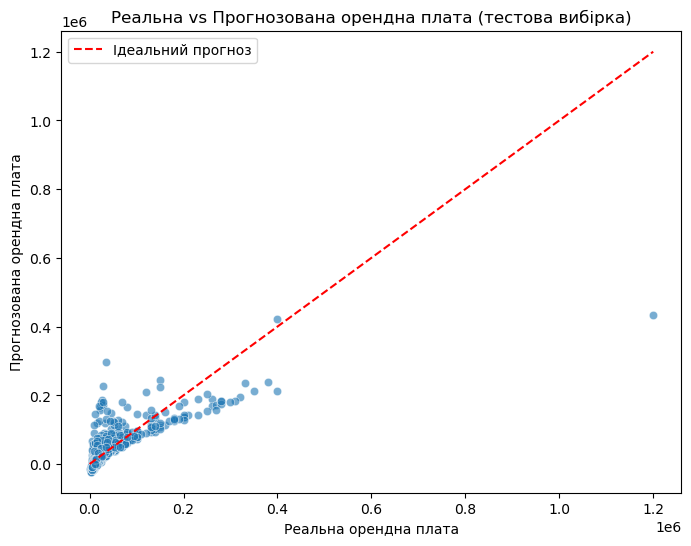

In [29]:
# Візуалізація: реальні vs прогнозовані значення
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--', label="Ідеальний прогноз")
plt.title("Реальна vs Прогнозована орендна плата (тестова вибірка)")
plt.xlabel("Реальна орендна плата")
plt.ylabel("Прогнозована орендна плата")
plt.legend()
plt.show()

<span style="color:green">**Отримана візуалізація підтверджує, що наші значення прямують до ідеальних, вони не критично відхиляються від лінії ідеальних прогнозів.**</span>

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

C:\Users\User\anaconda3\desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



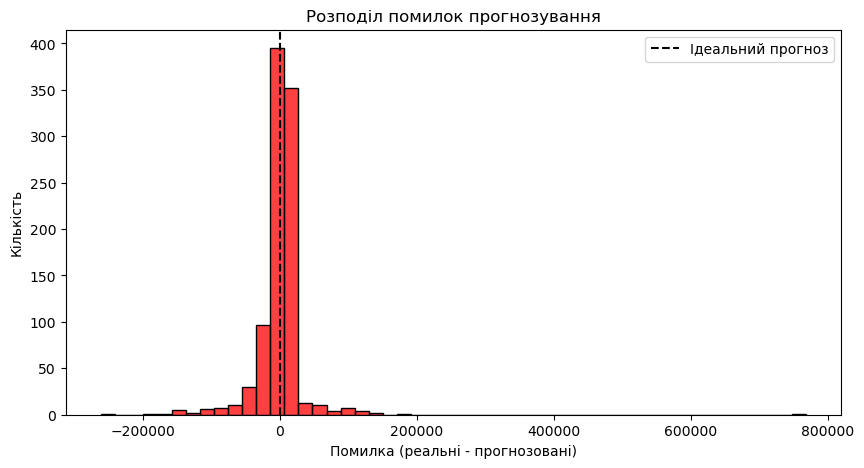

In [31]:
# Розраховуємо помилки (залишки)
residuals = y_test - y_test_pred

# Гістограма помилок
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=50, color="red")
plt.axvline(0, linestyle="--", color="black", label="Ідеальний прогноз")
plt.title("Розподіл помилок прогнозування")
plt.xlabel("Помилка (реальні - прогнозовані)")
plt.ylabel("Кількість")
plt.legend()
plt.show()

<span style="color:green">**Довгі хвости говоять нам про те, що модель погано справляється з врахуванням найдорожких квартир.**</span>

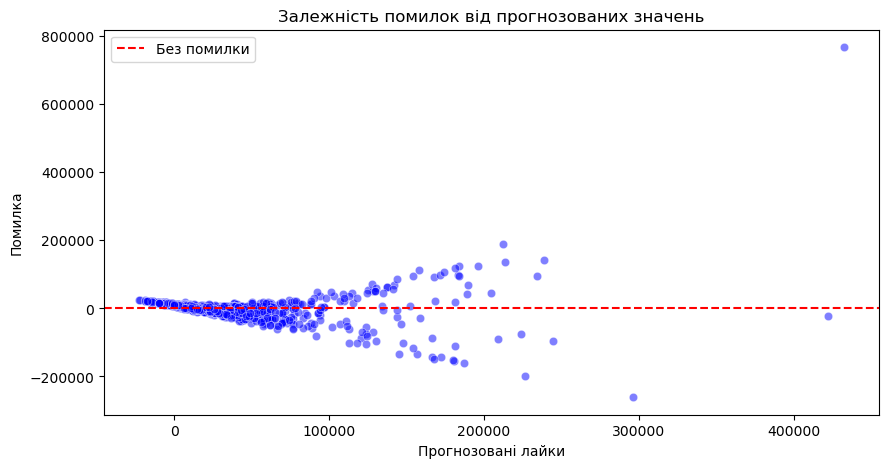

In [33]:
# Scatter plot: помилки vs прогнозовані значення
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5, color="blue")
plt.axhline(0, linestyle="--", color="red", label="Без помилки")
plt.title("Залежність помилок від прогнозованих значень")
plt.xlabel("Прогнозовані лайки")
plt.ylabel("Помилка")
plt.legend()
plt.show()

<span style="color:green">**Ще один графік говорить нам про більші помилки під час прогнозування для дорожчих квартир. Графік має вигляд воронки, де очевидно видно, що більші відхилення від ідеальних прогнозів відбуваються зі зростанням цін. Перевіримо це додатково. Здайдемо 5 найбільших помилок.**</span>

In [35]:
# Знаходимо прогнози з найбільшими помилками
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
})

# Топ-5 найбільших помилок
top_errors = errors_df.nlargest(5, 'error')
print("Прогнози з найбільшими помилками прогнозування:")
print(top_errors)

Прогнози з найбільшими помилками прогнозування:
         real      predicted          error
1001  1200000  432433.105952  767566.894048
2510    35000  295988.967185  260988.967185
2476    28000  226490.179620  198490.179620
1344   400000  212115.068003  187884.931997
2586    27000  187403.691883  160403.691883


In [36]:
# Спробуємо застосувати дерево прийняття рішень
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def print_metrics(y_true, y_pred, name="Тестова вибірка"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print("=" * 50)
    print(f"МЕТРИКИ ЯКОСТІ МОДЕЛІ ({name}):")
    print("=" * 50)
    print(f"MAE:  {mae:.2f} одиниць")
    print(f"RMSE: {rmse:.2f} одиниць")
    print(f"R²:   {r2:.3f}\n")

print_metrics(y_test, y_test_pred_dt, "тестова вибірка")
print_metrics(y_train, y_train_pred_dt, "тренувальна вибірка")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (тестова вибірка):
MAE:  2654.40 одиниць
RMSE: 18788.26 одиниць
R²:   0.911

МЕТРИКИ ЯКОСТІ МОДЕЛІ (тренувальна вибірка):
MAE:  0.00 одиниць
RMSE: 0.00 одиниць
R²:   1.000



<span style="color:green">**Модель було покращено, проте отримані результати виглядають нереалістично. Для тренувальної моделі результат є ідеальним. Можливо було допущенно помилку. Спробуємо прологорифмувати нашу цільову змінну. Можливо це покращить нашу ситуацію, де переважна більшіть квартир є дешевими, а невелика кількість- дуже дорогими.**</span>

C:\Users\User\anaconda3\desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



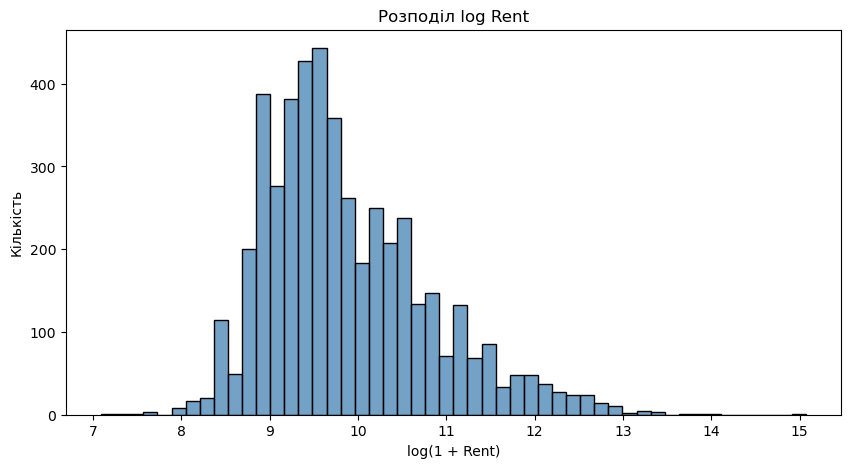

In [48]:
df["Rent_log"] = np.log1p(df["Rent"]) # log(1+Rent), щоб уникнути log(0)

plt.figure(figsize=(10,5))
sns.histplot(df["Rent_log"], bins=50, color="steelblue")
plt.title("Розподіл log Rent")
plt.xlabel("log(1 + Rent)")
plt.ylabel("Кількість")
plt.show()

In [39]:
# Логарифмізація цільової змінної
y_train_log = np.log1p(y_train)   # log(1+Rent)
y_test_log = np.log1p(y_test)

model = LinearRegression()
model.fit(X_train, y_train_log)


LinearRegression()

In [40]:
# Прогноз у логарифмах
y_test_pred_log = model.predict(X_test)

In [41]:
# Зворотна трансформація
y_test_pred = np.expm1(y_test_pred_log)  # exp(logRent) - 1

In [42]:
# Нове обчислення метрик

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тестовій вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f} одиниць")
print(f"RMSE: {rmse:.2f} одиниць")
print(f"R²: {r2_train:.3f}")

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f} одиниць")
print(f"RMSE: {rmse:.2f} одиниць")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ на тестовій вибірці:

MAE: 15968.17 одиниць
RMSE: 45683.73 одиниць
R²: 0.506
МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:

MAE: 19662.74 одиниць
RMSE: 57238.28 одиниць
R²: 0.506


<span style="color:green">**Отриманий результат є більш реалістичним, хоча він і не відрізняється особливо від результатів перевірки нашої початкової моделі.**</span>

C:\Users\User\anaconda3\desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



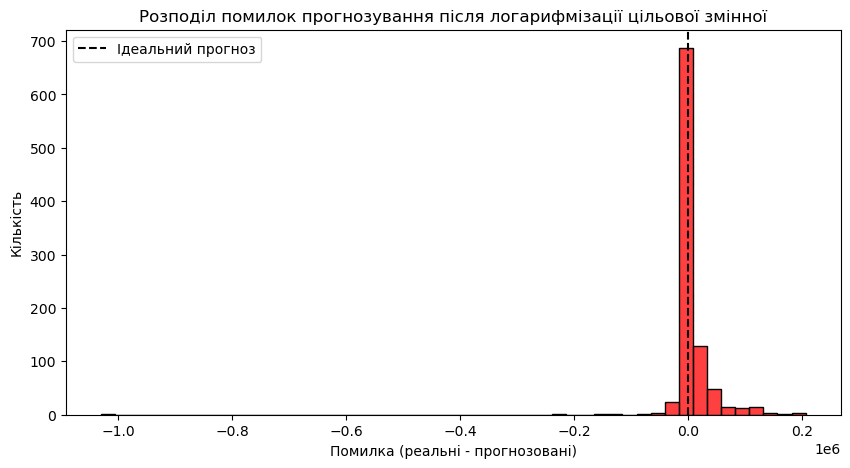

In [43]:
# Розраховуємо помилки (залишки)
residuals = y_test - y_test_pred

# Гістограма помилок
plt.figure(figsize=(10,5))
sns.histplot(residuals, bins=50, color="red")
plt.axvline(0, linestyle="--", color="black", label="Ідеальний прогноз")
plt.title("Розподіл помилок прогнозування після логарифмізації цільової змінної")
plt.xlabel("Помилка (реальні - прогнозовані)")
plt.ylabel("Кількість")
plt.legend()
plt.show()

<span style="color:green">**У цьому випадку хвіст для дешевих квартир значно коротший, й помилок у припущеннях менше. Для дорогих квартир довгий хвіст лишився. Покращення незначні.**</span>

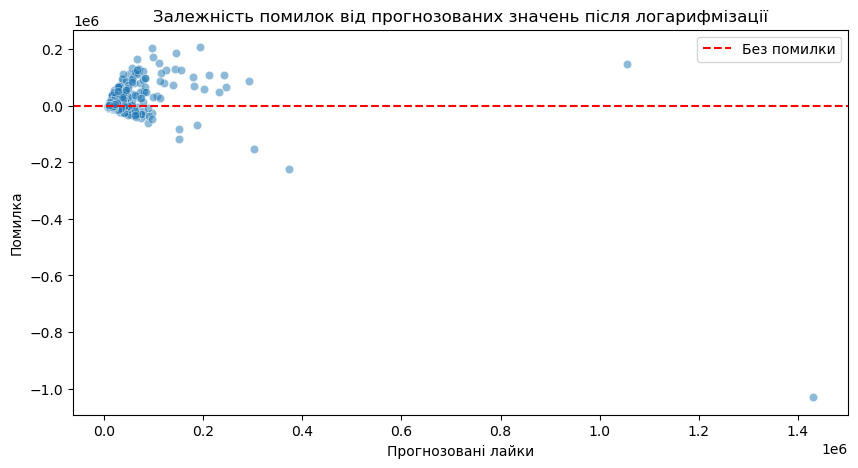

In [49]:
# Scatter plot: помилки vs прогнозовані значення
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(0, linestyle="--", color="red", label="Без помилки")
plt.title("Залежність помилок від прогнозованих значень після логарифмізації")
plt.xlabel("Прогнозовані лайки")
plt.ylabel("Помилка")
plt.legend()
plt.show()

<span style="color:green">**У покращенній моделі зберіглася лінійність прогнозів— це добре. Викиди для дорогих квартир лишаються значними. Знову ж таки— покращення вийшло незначним.**</span>